In [1]:
import sys
sys.path.append('..')
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.optim.adam import Adam

In [2]:
from metrics import VAELoss
from data import LoFiDataset
from vae import DenseVAE, Conv1DVAE, LSTMVAE

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [4]:
dataset = LoFiDataset('../data')

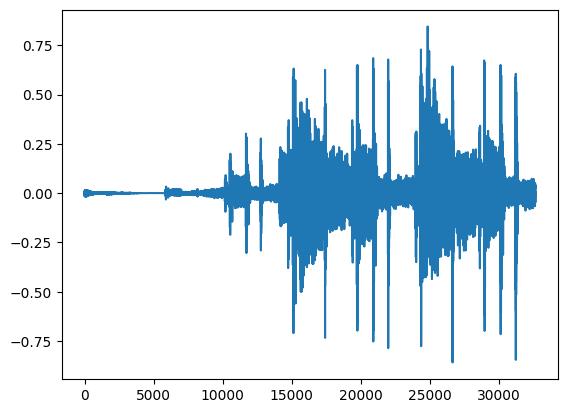

In [7]:
plt.plot(dataset[30])

In [5]:
batch_size = 32
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [6]:
model = LSTMVAE(2, 32921, 2, 300, device).to(device)
optimizer = Adam(model.parameters(), lr=1e-3)
loss_function = VAELoss()

In [ ]:
model

In [8]:
from utils import train, save_sample

In [ ]:
loss_curve = train(model, train_loader, loss_function, optimizer, epochs=100, device=device, save_path='best_model.pth')

In [ ]:
plt.plot(loss_curve)

In [ ]:
model.load_state_dict(torch.load('best_model.pth', weights_only=True))

In [ ]:
a = model.sample(scale=2)
b = save_sample(a, 'asd.wav')
plt.plot(b[0])